In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [2]:
df = pd.read_csv("cleaned_codon_usage.csv")
df

,Unnamed: 0,Kingdom,DNAtype,UUU,UUC,UUA,UUG,CUU,CUC,CUA,...,CGG,AGA,AGG,GAU,GAC,GAA,GAG,UAA,UAG,UGA
0,0,4,0,0.01654,0.01203,0.00050,0.00351,0.01203,0.03208,0.00100,...,0.00451,0.01303,0.03559,0.01003,0.04612,0.01203,0.04361,0.00251,0.00050,0.00000
1,1,4,0,0.02714,0.01357,0.00068,0.00678,0.00407,0.02849,0.00204,...,0.00136,0.01696,0.03596,0.01221,0.04545,0.01560,0.04410,0.00271,0.00068,0.00000
2,2,4,0,0.01974,0.02180,0.01357,0.01543,0.00782,0.01111,0.01028,...,0.00596,0.01974,0.02489,0.03126,0.02036,0.02242,0.02468,0.00391,0.00000,0.00144
3,3,4,0,0.01775,0.02245,0.01619,0.00992,0.01567,0.01358,0.00940,...,0.00366,0.01410,0.01671,0.03760,0.01932,0.03029,0.03446,0.00261,0.00157,0.00000
4,4,4,0,0.02816,0.01371,0.00767,0.03679,0.01380,0.00548,0.00473,...,0.00604,0.01494,0.01734,0.04148,0.02483,0.03359,0.03679,0.00000,0.00044,0.00131
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12957,12957,2,0,0.02552,0.03555,0.00547,0.01367,0.01276,0.02097,0.00820,...,0.00820,0.01367,0.01094,0.01367,0.02279,0.02005,0.04102,0.00091,0.00091,0.00638
12958,12958,2,1,0.01258,0.03193,0.01984,0.00629,0.01451,0.05322,0.07644,...,0.00145,0.00000,0.00048,0.00194,0.01306,0.01838,0.00677,0.00242,0.00097,0.01887
12959,12959,2,1,0.01423,0.03321,0.01661,0.00356,0.01127,0.05042,0.09609,...,0.00000,0.00000,0.00000,0.00178,0.01661,0.02788,0.00297,0.00356,0.00119,0.02017
12960,12960,2,0,0.01757,0.02028,0.00767,0.01293,0.01319,0.01959,0.00715,...,0.01142,0.01217,0.01196,0.02178,0.02510,0.02896,0.03959,0.00099,0.00079,0.00156


In [3]:
y = df['DNAtype']
x = df.drop(columns=['Unnamed: 0','DNAtype','Kingdom'])

In [4]:
nsp_classes = y.unique()

In [5]:
# For Multi Outputs
from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder


# label encoder y
encoder = LabelEncoder()
encoder.fit(y)
y = encoder.transform(y)
y = np_utils.to_categorical(y)

In [6]:
y.shape

(12962, 3)

In [7]:
# Data Standardization with Standard Scaler
from sklearn.preprocessing import StandardScaler
Scaler=StandardScaler()
x=Scaler.fit_transform(x)

x[0:3]

x.shape

(12962, 64)

In [8]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state = 100)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(10369, 64) (2593, 64) (10369, 3) (2593, 3)


In [9]:
# Multi Layer Perceptron Artificial Neural Network
from sklearn.neural_network import MLPClassifier 

mlpc_params = {"alpha": [0.1, 0.01, 0.0001],
              "hidden_layer_sizes": [(10,10,10),
                                     (100,100,100),
                                     (100,100)],
              "solver" : ["lbfgs","adam","sgd"],
              "activation": ["relu","logistic"]}

from sklearn.model_selection import GridSearchCV




mlpc = MLPClassifier(random_state = 0) # ANN model object created

# Model CV process 
mlpc_cv_model = GridSearchCV(mlpc, mlpc_params, 
                         cv = 5, # To make a 5-fold CV
                         n_jobs = -1, # Number of jobs to be run in parallel (-1: means to use all processors)
                         verbose = 2) # Controls the level of detail: higher means more messages gets value as integer.

mlpc_cv_model.fit(x_train, y_train) 


# The best parameter obtained as a result of CV process

print("The best parameters: " + str(mlpc_cv_model.best_params_))

Fitting 5 folds for each of 54 candidates, totalling 270 fits
The best parameters: {'activation': 'relu', 'alpha': 0.1, 'hidden_layer_sizes': (100, 100, 100), 'solver': 'adam'}


In [11]:
# Model Tuning
# Setting the Final Model with the best parameter

mlpc_tuned = mlpc_cv_model.best_estimator_

# Fitting Final Model
mlpc_tuned.fit(x_train, y_train)

MLPClassifier(alpha=0.1, hidden_layer_sizes=(100, 100, 100), random_state=0)

In [12]:
#%% Confusion Matrix and Classification Report
from sklearn.metrics import confusion_matrix, classification_report 

# Classification Report
y_pred = mlpc_tuned.predict(x_test)
model_report = classification_report(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1))
print(model_report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1852
           1       1.00      1.00      1.00       579
           2       0.99      0.96      0.98       162

    accuracy                           1.00      2593
   macro avg       1.00      0.99      0.99      2593
weighted avg       1.00      1.00      1.00      2593



In [13]:
from scipy import interp
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
# Learn to predict each class against the other


n_classes = 3 # number of class




# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred[:, i], )
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_pred.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

C:\Users\11518\AppData\Local\Temp\ipykernel_28260\2825547594.py:9: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])


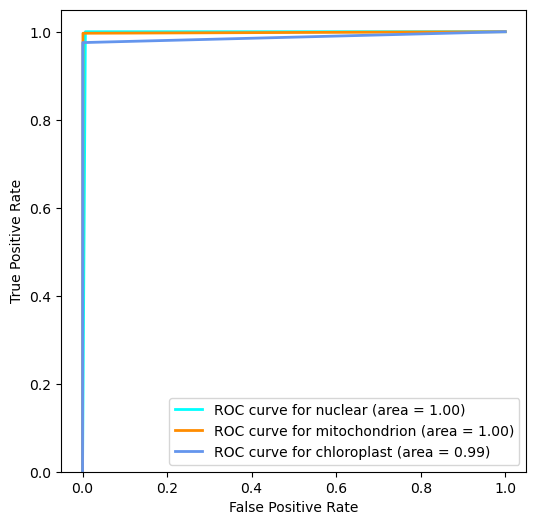

In [41]:
from itertools import cycle
roc_auc_scores = []
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.subplots(figsize=(6, 6))
colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
class_name = ['nuclear', 'mitochondrion', 'chloroplast']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve for {0} (area = {1:0.2f})'
             ''.format(class_name[i], roc_auc[i]))
    roc_auc_scores.append(roc_auc[i])


plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()
